<a href="https://colab.research.google.com/github/RacaProjects/Curso_Python/blob/main/Prueba_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=d44471cca15b4910ad03947205af67057e8aec6e36d2a7259fd71417381e8df4
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
crime_data = pd.read_csv("/content/sample_data/crime_data.csv")

crime_data

X = crime_data.iloc[:, [1, 2,3,4]].values

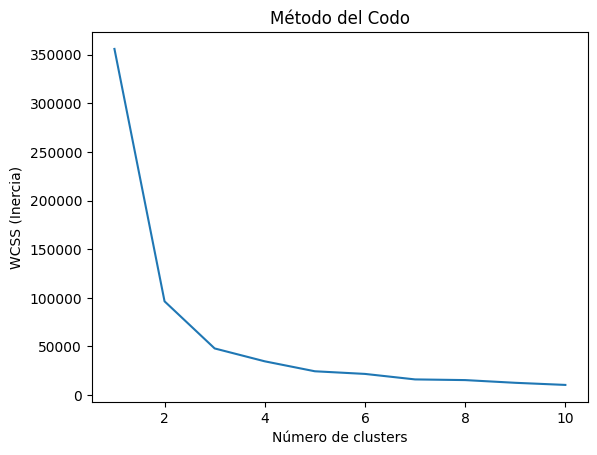

In [ ]:
# Suponiendo que X es el conjunto de datos con las variables a utilizar para el clustering
wcss = []  # Lista para almacenar la inercia (WCSS)

# Probar con diferentes números de clusters (de 1 a 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)  # Entrenar el modelo K-Means
    wcss.append(kmeans.inertia_)  # Guardar la inercia (WCSS)

# Graficar la inercia en función del número de clusters
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Inercia)')
plt.show()

In [ ]:


# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
crime_data['Cluster'] = kmeans.fit_predict(X)

# Asignar etiquetas más descriptivas a los clusters
crime_data['Crime Level'] = crime_data['Cluster'].map({
    0: 'Low Crime',
    1: 'Medium Crime',
    2: 'High Crime'
})

# Ver el resultado agrupado
print(crime_data[['Unnamed: 0', 'Crime Level']])

        Unnamed: 0   Crime Level
0          Alabama  Medium Crime
1           Alaska  Medium Crime
2          Arizona  Medium Crime
3         Arkansas    High Crime
4       California  Medium Crime
5         Colorado    High Crime
6      Connecticut     Low Crime
7         Delaware  Medium Crime
8          Florida  Medium Crime
9          Georgia    High Crime
10          Hawaii     Low Crime
11           Idaho     Low Crime
12        Illinois  Medium Crime
13         Indiana     Low Crime
14            Iowa     Low Crime
15          Kansas     Low Crime
16        Kentucky     Low Crime
17       Louisiana  Medium Crime
18           Maine     Low Crime
19        Maryland  Medium Crime
20   Massachusetts    High Crime
21        Michigan  Medium Crime
22       Minnesota     Low Crime
23     Mississippi  Medium Crime
24        Missouri    High Crime
25         Montana     Low Crime
26        Nebraska     Low Crime
27          Nevada  Medium Crime
28   New Hampshire     Low Crime
29      Ne

In [ ]:
high_crime_states = crime_data[crime_data['Crime Level'] == 'High Crime']
print(high_crime_states[['Unnamed: 0', 'Crime Level']])

       Unnamed: 0 Crime Level
3        Arkansas  High Crime
5        Colorado  High Crime
9         Georgia  High Crime
20  Massachusetts  High Crime
24       Missouri  High Crime
29     New Jersey  High Crime
35       Oklahoma  High Crime
36         Oregon  High Crime
38   Rhode Island  High Crime
41      Tennessee  High Crime
42          Texas  High Crime
45       Virginia  High Crime
46     Washington  High Crime
49        Wyoming  High Crime


In [ ]:
# Función para asignar recursos según el nivel de criminalidad
def assign_resources(crime_level):
    if crime_level == 'High Crime':
        return 'Policías Capacitados'
    elif crime_level == 'Medium Crime':
        return 'Policías de a pie'
    else:
        return 'Cadetes'

crime_data['Assigned Resources'] = crime_data['Crime Level'].apply(assign_resources)

# Ver la distribución final de recursos
print(crime_data[['Unnamed: 0', 'Crime Level', 'Assigned Resources']])

        Unnamed: 0   Crime Level    Assigned Resources
0          Alabama  Medium Crime     Policías de a pie
1           Alaska  Medium Crime     Policías de a pie
2          Arizona  Medium Crime     Policías de a pie
3         Arkansas    High Crime  Policías Capacitados
4       California  Medium Crime     Policías de a pie
5         Colorado    High Crime  Policías Capacitados
6      Connecticut     Low Crime               Cadetes
7         Delaware  Medium Crime     Policías de a pie
8          Florida  Medium Crime     Policías de a pie
9          Georgia    High Crime  Policías Capacitados
10          Hawaii     Low Crime               Cadetes
11           Idaho     Low Crime               Cadetes
12        Illinois  Medium Crime     Policías de a pie
13         Indiana     Low Crime               Cadetes
14            Iowa     Low Crime               Cadetes
15          Kansas     Low Crime               Cadetes
16        Kentucky     Low Crime               Cadetes
17       L

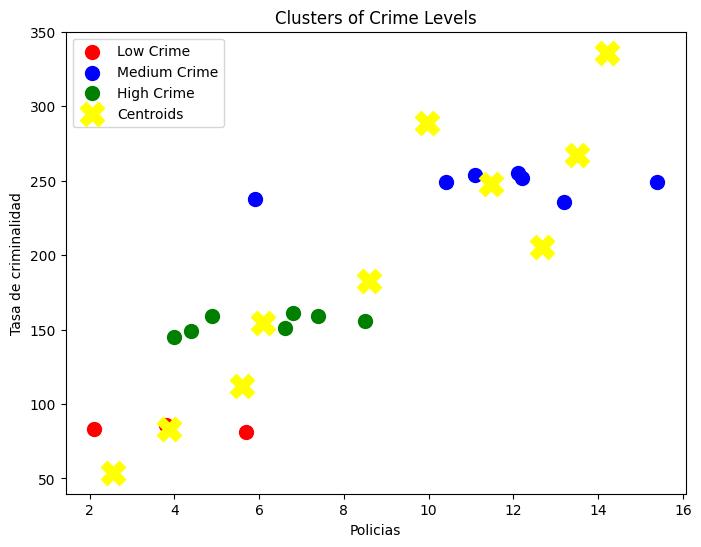

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que X son las dos variables que se usaron para el clustering
plt.figure(figsize=(8, 6))

# Graficar cada cluster con colores diferentes
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s=100, c='red', label='Low Crime')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s=100, c='blue', label='Medium Crime')
plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], s=100, c='green', label='High Crime')

# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Etiquetas y título
plt.title('Clusters of Crime Levels')
plt.xlabel('Policias')  # Cambia según tu dataset.
plt.ylabel('Tasa de criminalidad')  # Cambia según tu dataset.
plt.legend()
plt.show()


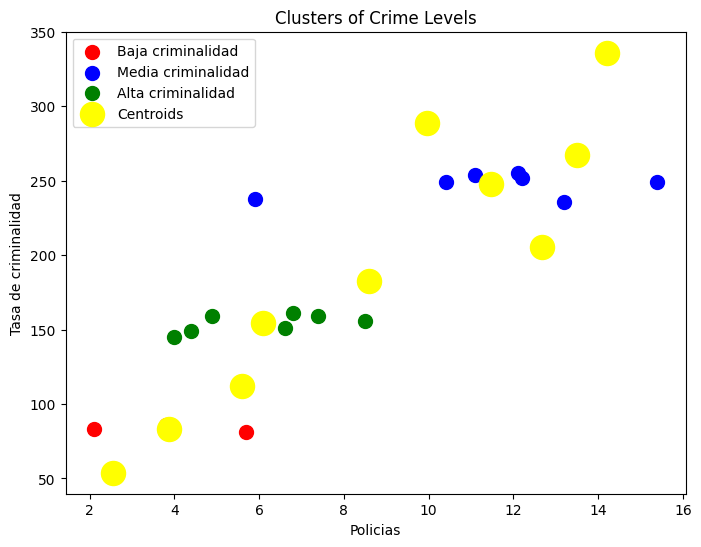

In [ ]:
# Asumiendo que X son las dos variables que se usaron para el clustering
plt.figure(figsize=(8, 6))

# Graficar cada cluster con colores diferentes
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s=100, c='red', label='Baja criminalidad')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s=100, c='blue', label='Media criminalidad')
plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1], s=100, c='green', label='Alta criminalidad')

# Graficar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Etiquetas y título
plt.title('Clusters of Crime Levels')
plt.xlabel('Policias')  # Cambia según tu dataset.
plt.ylabel('Tasa de criminalidad')  # Cambia según tu dataset.
plt.legend()
plt.show()